# W05 - Class Practice
# Data Mining (Kamis)
W05 - 0706022310028 - Jevon Ivander K

**Dataset Information**

The HR Attrition dataset contains employee-level data that describe demographic, job, and
performance information.
Target variable: Attrition (Yes/No) - indicates whether the employee has left the company.
Features:
* Employee_ID: Unique identifier for each employee.
* Age: Age of the employee.
* Gender: Gender of the employee.
* Marital_Status: Marital status of the employee (Single, Married, Divorced).
* Department: Department the employee works in (e.g., HR, IT, Sales, Marketing).
* Job_Role: Specific role within the department (e.g., Manager, Analyst).
* Job_Level: Level in the organizational hierarchy.
* Monthly_Income: Monthly salary of the employee.
* Hourly_Rate: Rate per hour for hourly employees.
* Years_at_Company: Number of years the employee has been with the company.
* Years_in_Current_Role: Number of years the employee has been in their current role.
* Years_Since_Last_Promotion: Time since the employee’s last promotion.
* Work_Life_Balance: Rating of work-life balance.
* Job_Satisfaction: Rating of job satisfaction (1-5 scale).
* Performance_Rating: Performance rating (1-5 scale).
* Training_Hours_Last_Year: Number of training hours completed in the past year.
* Overtime: Whether the employee works overtime (Yes/No).
* Project_Count: Number of projects managed by the employee.
* Average_Hours_Worked_Per_Week: Average working hours per week.
* Absenteeism: Number of days the employee was absent in the past year.
* Work_Environment_Satisfaction: Rating of work environment satisfaction.
* Relationship_with_Manager: Rating of the relationship with the manager.
* Job_Involvement: Rating of job involvement.
* Distance_From_Home: Distance from home to the workplace (in kilometers).
* Number_of_Companies_Worked: Total number of companies the employee has worked for.

# Data Preprocessing

## 1. Load and inspect the dataset: check data structure, missing values, constant/identifier columns

In [180]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [181]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [182]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

There are no missing values, but unknown values need to be checked more deeply.

In [183]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [184]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [185]:
# show unique values count from dataset
unique_values_count = {col: df[col].nunique() for col in df.columns}
display(unique_values_count)

{'Employee_ID': 1000,
 'Age': 40,
 'Gender': 2,
 'Marital_Status': 3,
 'Department': 5,
 'Job_Role': 4,
 'Job_Level': 5,
 'Monthly_Income': 971,
 'Hourly_Rate': 85,
 'Years_at_Company': 29,
 'Years_in_Current_Role': 14,
 'Years_Since_Last_Promotion': 10,
 'Work_Life_Balance': 4,
 'Job_Satisfaction': 5,
 'Performance_Rating': 4,
 'Training_Hours_Last_Year': 100,
 'Overtime': 2,
 'Project_Count': 9,
 'Average_Hours_Worked_Per_Week': 30,
 'Absenteeism': 20,
 'Work_Environment_Satisfaction': 4,
 'Relationship_with_Manager': 4,
 'Job_Involvement': 4,
 'Distance_From_Home': 49,
 'Number_of_Companies_Worked': 4,
 'Attrition': 2}

The number of unique values indicates which columns may require one-hot encoding or nominal/ordinal encoding.

## 2. Handle missing or inconsistent data, if any

* There are no missing values, and no unknown values were found upon deeper inspection.
* There are no constant data columns. The 'Employee_ID' column is an identifier and should be dropped as it cannot be analyzed.
* The 'Job_Role' column is also dropped because the number of unique values for 'Job_Role' and 'Job_Level' is different, suggesting that one 'Job_Level' might encompass multiple 'Job_Role's. Since both columns serve a similar function, dropping one is preferable. 'Job_Role' is chosen for dropping as it is still in text format.

In [186]:
# Drop Employee_ID and Job_Role as they are not needed for the analysis.
df = df.drop(columns=['Employee_ID', 'Job_Role'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Level                      1000 non-null   int64 
 5   Monthly_Income                 1000 non-null   int64 
 6   Hourly_Rate                    1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

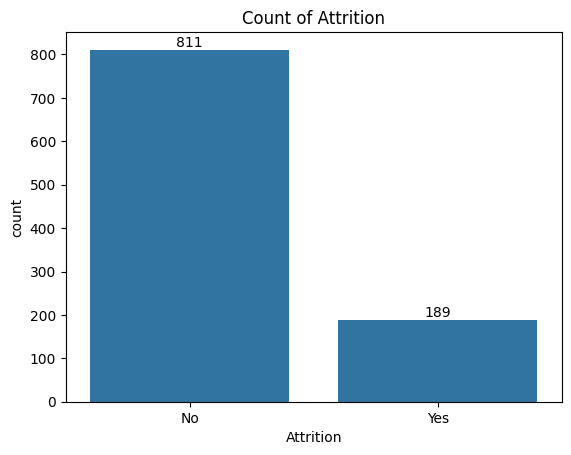

In [187]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

It can be seen that this is an imbalanced dataset.

## 3. Encode categorical features appropriately:

○ Nominal

○ Ordinal → Integer mapping or ordered categorical dtype

In [188]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
# There is nothing that needs ordinal encoding. One example of ordinal data is Job_Level, but
# it is already in numerical form so it doesn't need encoding. Job_Role also doesn't need
# ordinal encoding because Job_Level exists.


# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Marital_Status', 'Department']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
459,23,1,2.0,0.0,1,12856,96,12,9,0,4,3,3,62,1,5,43,11,1,2,3,19,3,0
900,56,1,1.0,2.0,4,17873,64,8,8,2,1,3,2,14,1,9,47,2,4,3,4,11,3,0
589,29,1,2.0,3.0,5,3615,62,26,8,6,3,3,4,89,0,6,59,2,2,3,1,28,2,0
115,45,0,1.0,2.0,2,9331,80,2,5,8,2,2,4,17,1,3,51,5,2,4,3,47,4,0
448,54,1,2.0,2.0,2,12456,87,20,1,1,4,1,1,95,0,6,30,5,2,1,3,14,4,0


In [189]:
# checking encode result
df.loc[382]

,382
Age,59
Gender,Male
Marital_Status,Single
Department,Sales
Job_Level,5
Monthly_Income,17745
Hourly_Rate,35
Years_at_Company,25
Years_in_Current_Role,4
Years_Since_Last_Promotion,7


Cross-checked one of the rows to ensure encoding is correct, and it has been confirmed as correct.

## 4. Partition the data into training and testing sets

### Separate features and target

Subtask:
Define the features (X) and the target variable (y).

Reasoning: Define the features (X) by dropping the target variable 'Attrition' from the DataFrame and define the target variable (y) as the 'Attrition' column.




In [190]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [191]:
y.head() # pastiin targetnya udah benar

,Attrition
0,0
1,0
2,0
3,0
4,0


### Split Data

Subtask:
Split the encoded data into training and testing sets.

Reasoning: Split the encoded feature DataFrame X and the target Series y into training and testing sets.

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [193]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 23), (300, 23))

In [194]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [195]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Model Development

## 1. Use Decision Tree classification models
## 2. Hyperparameter tuning using:

○ GridSearchCV or manual parameter testing

○ Evaluate performance using k-fold cross-validation (if needed).

## 3. Handle class imbalance (if necessary) using Oversampling/ Undersampling

## 4. Optionally, perform feature selection (e.g., feature importance, correlation filtering).

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       245
           1       0.17      0.27      0.21        55

    accuracy                           0.63       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.69      0.63      0.66       300



It can be seen that the f1-score on the Test Set, especially for class 1, has a poor value. This is also influenced by the small amount of data.

As seen bellow the === Classification Report (Test Set) ===

**What to do next?**

*   The F1 Score also significantly different so we need to handle this imbalance dataset.
*   The accuracy of training set is 100% and testing set is 63%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will tune the parameter by add a max_depth (limiting the depth/ branching of tree) and etc.
*   And maybe we need to select and drop some features for the model.

* Oversampling/undersampling is done after separating X and y.
* SMOTE (0, 1, then can be like 0.5) is good for numerical data.
* SMOTENC (0, 1, 2...) is good for categorical data.

### Oversampling using SMOTENC

In [197]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Level',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Overtime',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 23), (487, 23))

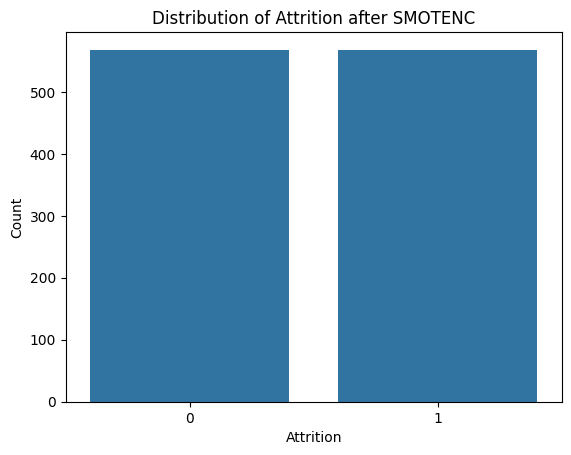

In [198]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

We successfully fixed oversampling with SMOTENC.

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Level                      1000 non-null   int64 
 5   Monthly_Income                 1000 non-null   int64 
 6   Hourly_Rate                    1000 non-null   int64 
 7   Years_at_Company               1000 non-null   int64 
 8   Years_in_Current_Role          1000 non-null   int64 
 9   Years_Since_Last_Promotion     1000 non-null   int64 
 10  Work_Life_Balance              1000 non-null   int64 
 11  Job_Satisfaction               1000 non-null   int64 
 12  Performance_Rating             1000 non-null   int64 
 13  Trai

In [200]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       244
           1       0.66      0.77      0.71       243

    accuracy                           0.68       487
   macro avg       0.69      0.68      0.68       487
weighted avg       0.69      0.68      0.68       487



Performance is improving, but I'm still not satisfied. So, I want to handle overfitting with KFold Cross Validation.

In [201]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


This output shows how your data is split into 5 parts (folds) for cross-validation. Each fold will be used as a test set once, while the rest are used to train the model.

In [202]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66463415 0.71044776 0.68965517 0.73590504 0.76315789]
Average score: 0.71


An average F1-score of 0.71 indicates moderate model performance in predicting attrition. There is still room for improvement and hyperparameter tuning to increase score consistency across each fold. I am still not satisfied, so we need to process it further.

In [203]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 41}
Best cross-validation f1 score: 0.703


max_depth / random_state can be changed repeatedly until the results are satisfactory. The F1 score is 70.3%, but I hope it can be better with feature importance.

### Feature Importance

In [204]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.03454022 0.         0.02876686 0.02569311 0.02660473 0.08594918
 0.06253723 0.08782291 0.03053455 0.06396636 0.01507542 0.00909381
 0.03091641 0.0679846  0.00352423 0.06224882 0.10221974 0.07080194
 0.02155533 0.0129054  0.03498869 0.07776723 0.04450323]


These numbers indicate how important each feature in the dataset is for making decisions in the Decision Tree model. A higher value means the feature is more influential in predicting the target (Attrition). A visualization is created to make it easier to read.

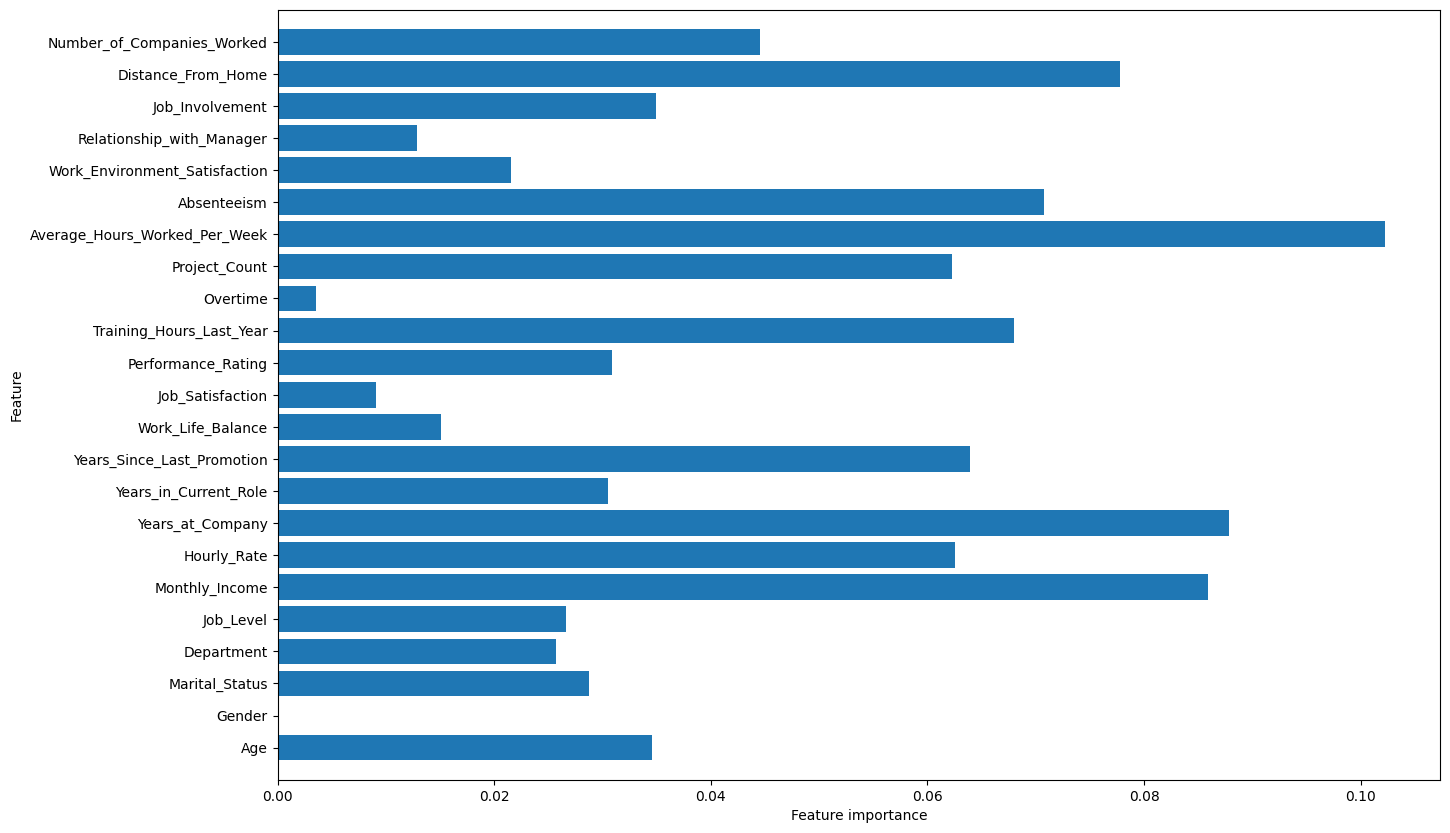

In [205]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [206]:
# Show feature importances greater than 0.05 (ini utk mengerucutkan lagi features mana yg termasuk bagus)
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Average_Hours_Worked_Per_Week,0.102220
Years_at_Company,0.087823
Monthly_Income,0.085949
Distance_From_Home,0.077767
Absenteeism,0.070802
Training_Hours_Last_Year,0.067985
Years_Since_Last_Promotion,0.063966
Hourly_Rate,0.062537
Project_Count,0.062249


In [207]:
# using only important features for the prediction
important_features = [
    "Average_Hours_Worked_Per_Week",
    "Monthly_Income",
    "Years_at_Company",
    "Absenteeism",
    "Training_Hours_Last_Year",
    "Years_Since_Last_Promotion",
    "Distance_From_Home",
    "Project_Count",
    "Hourly_Rate"
]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [208]:
display(X_importance)
display(y_importance)

,Average_Hours_Worked_Per_Week,Monthly_Income,Years_at_Company,Absenteeism,Training_Hours_Last_Year,Years_Since_Last_Promotion,Distance_From_Home,Project_Count,Hourly_Rate
0,54,15488,15,17,14,2,20,6,28
1,45,13079,6,1,6,1,25,2,28
2,34,13744,24,2,77,8,45,6,24
3,48,6809,10,18,49,2,35,9,26
4,33,10206,29,0,64,1,44,3,52
...,...,...,...,...,...,...,...,...,...
995,46,4172,24,10,76,3,24,4,76
996,36,11007,19,16,53,0,39,7,71
997,46,4641,25,9,7,3,33,1,43
998,52,19855,13,17,54,0,41,4,92


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


Oversampling is performed again because we are now only using a subset of features considered important (X_importance) rather than all existing features. Performing oversampling again on this feature subset ensures that the data used to train the model with important features remains balanced between the target classes.

In [209]:
# oversampling again
categorical_features = ["Average_Hours_Worked_Per_Week", "Monthly_Income"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 9), (487, 9))

In [210]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.73      0.65      0.68       255
           1       0.65      0.73      0.69       232

    accuracy                           0.69       487
   macro avg       0.69      0.69      0.69       487
weighted avg       0.69      0.69      0.69       487



I still want to improve the score because, based on the results above, there was an increase but it's still not satisfactory. So, I will try to select X Features based on their correlation.

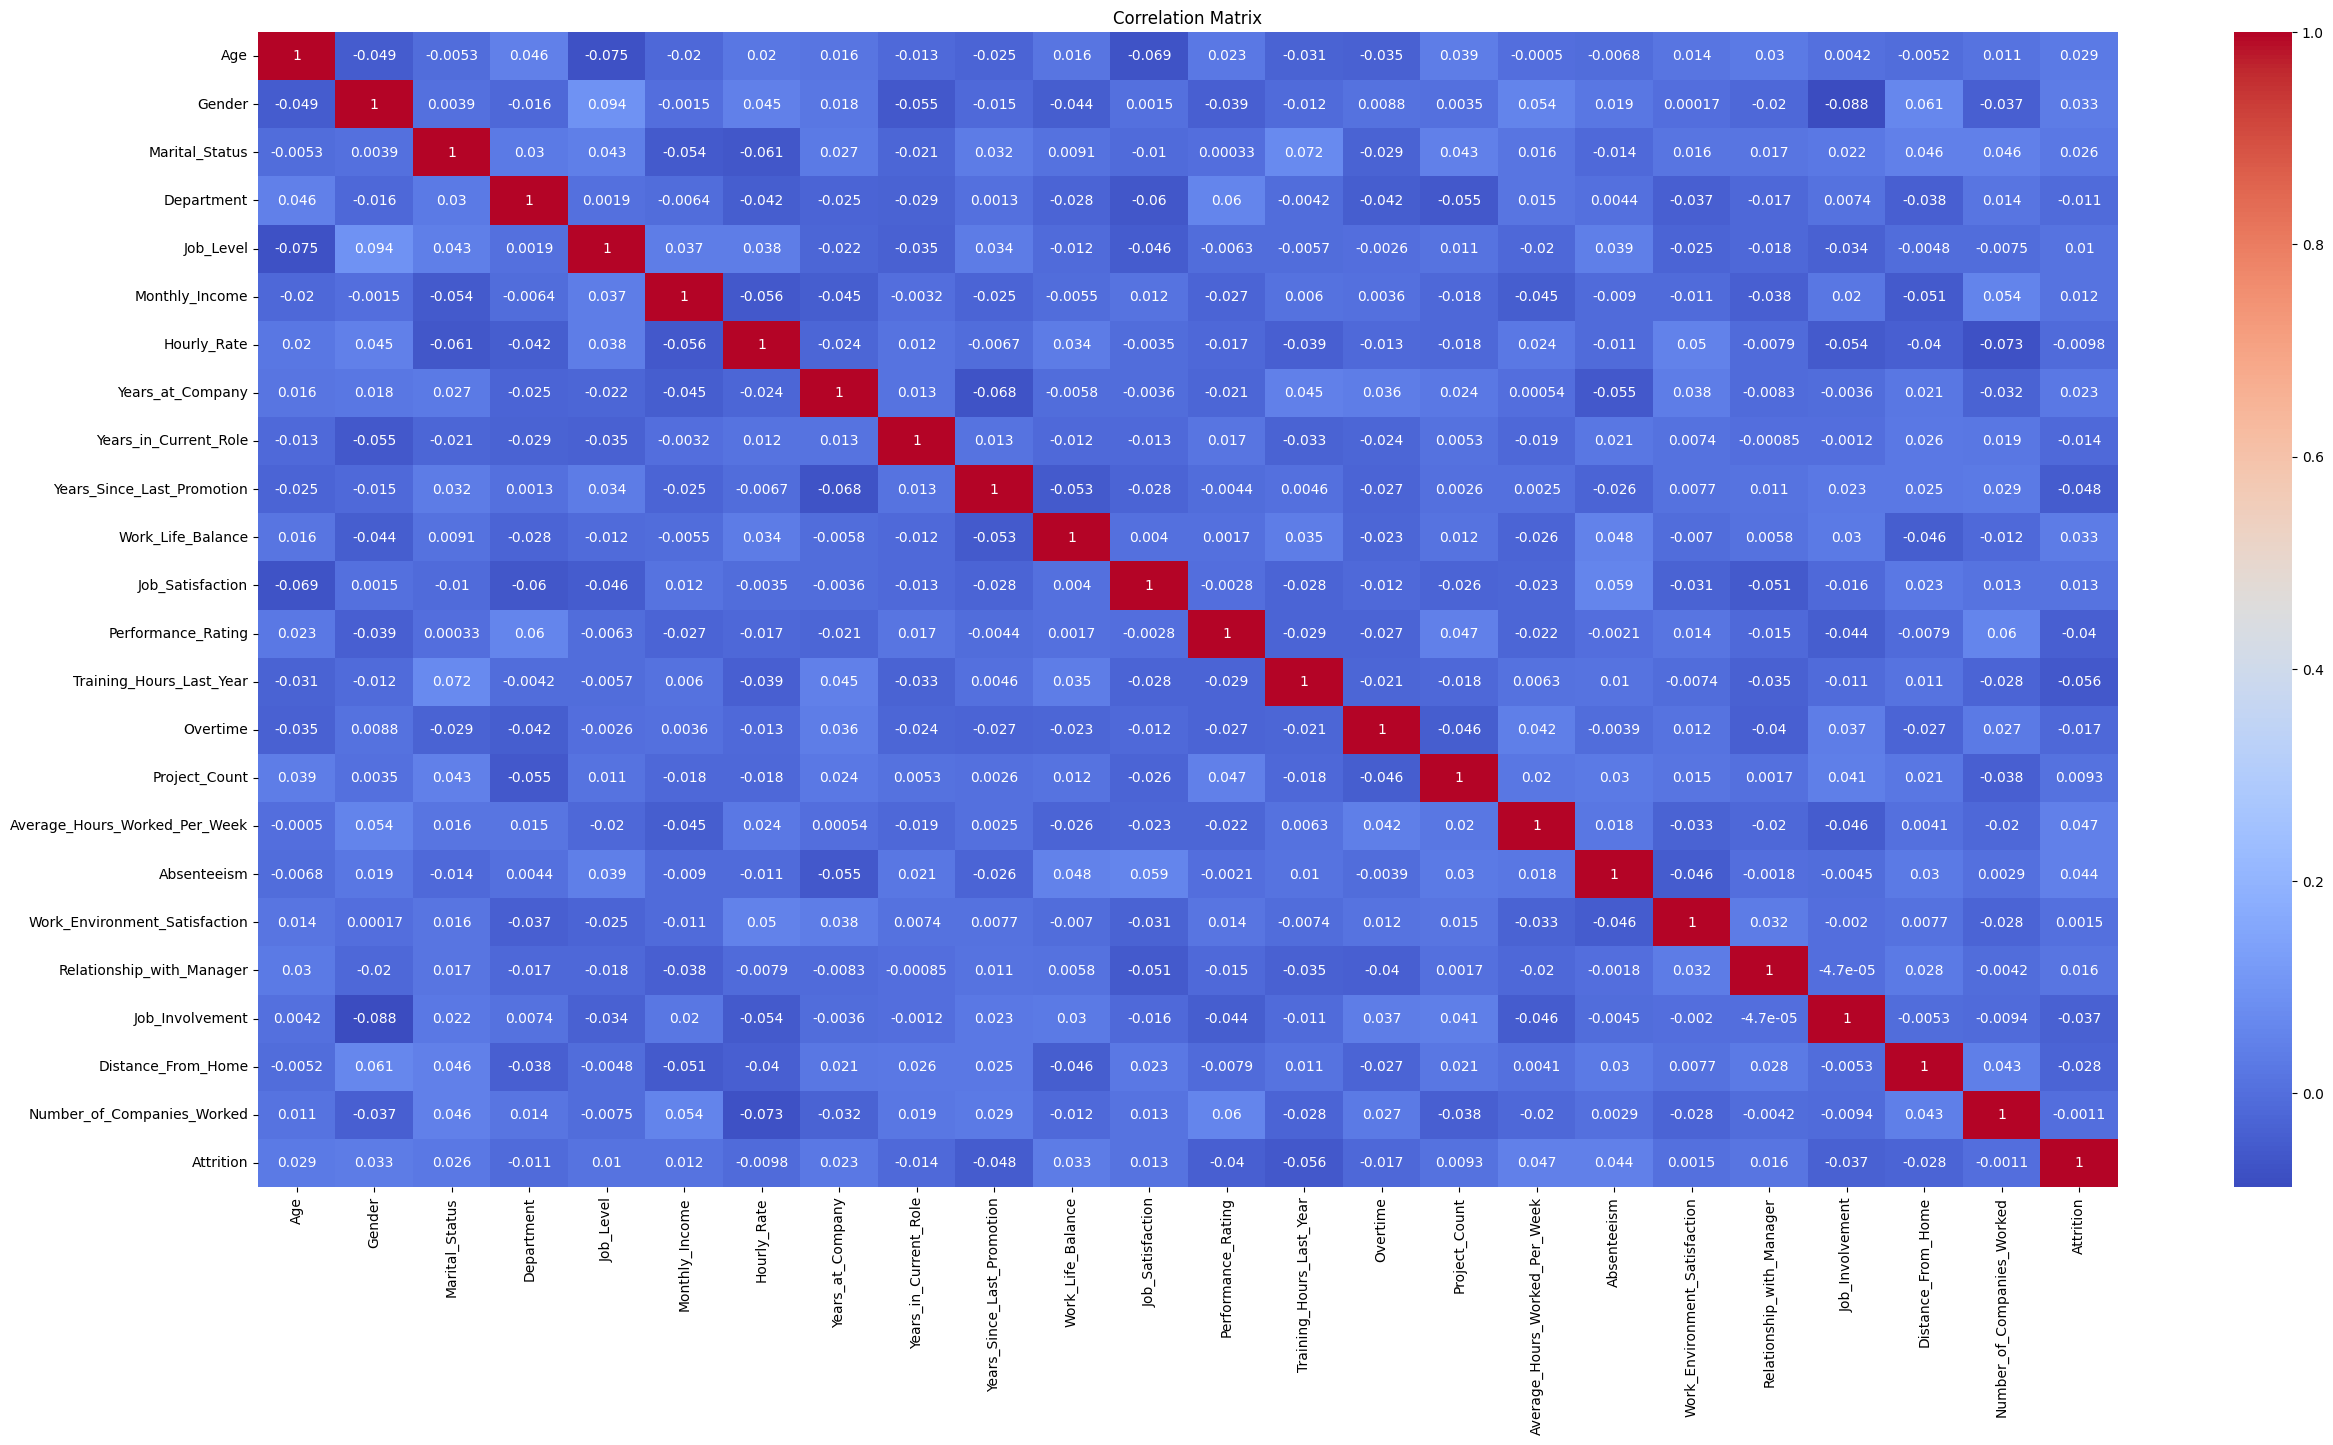

In [211]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the heatmap, let's identify the features that have a strong correlation with 'Attrition'. We'll also look for highly correlated features among themselves and choose the one with the stronger correlation to the target variable.

In [212]:
# Calculate the correlation of all features with 'Attrition'
correlation_with_attrition = df_encoded.corr()['Attrition'].sort_values(ascending=False)

# Display the correlation with Attrition
display(correlation_with_attrition)

# Based on the heatmap and correlation with Attrition, let's select the features.
# We will consider features with a reasonably strong correlation with Attrition
# and avoid highly correlated features among themselves by picking the one with higher
# correlation to the target.

# Example based on your prompt: JobLevel and MonthlyIncome.
# MonthlyIncome has a correlation of -0.15 compared to JobLevel's -0.02.
# So we keep MonthlyIncome and drop JobLevel if they are highly correlated with each other.
# Let's check the correlation between JobLevel and MonthlyIncome:
correlation_joblevel_monthlyincome = df_encoded['Job_Level'].corr(df_encoded['Monthly_Income'])
print(f"\nCorrelation between Job_Level and Monthly_Income: {correlation_joblevel_monthlyincome:.2f}")

# Let's select features with a correlation magnitude greater than a certain threshold (e.g., 0.05)
# You can adjust this threshold based on your analysis.
correlation_threshold = 0.025
highly_correlated_features = correlation_with_attrition[abs(correlation_with_attrition) > correlation_threshold].index.tolist()

# Remove 'Attrition' from the list of features
if 'Attrition' in highly_correlated_features:
    highly_correlated_features.remove('Attrition')

print(f"\nFeatures with correlation magnitude > {correlation_threshold} with Attrition:")
print(highly_correlated_features)

# Now, let's refine this list by considering multicollinearity among the selected features.
# We can look at the correlation matrix of these highly correlated features and remove
# one of a pair of highly correlated features (e.g., correlation > 0.7 or 0.8)
# keeping the one with a higher correlation to Attrition.

# For this example, let's just use the highly correlated features identified above.
# You can manually inspect the heatmap of these features for multicollinearity
# and adjust the 'selected_features' list accordingly if needed.

# Include some relevant categorical features manually based on the dataset description and heatmap
# We are now selecting based on the threshold, so we don't need to manually add categorical features
# unless some important ones were missed by the threshold.
selected_features = highly_correlated_features

X_selected = df_encoded[selected_features]
y_selected = df_encoded['Attrition']

display(X_selected.head())
display(y_selected.head())

,Attrition
Attrition,1.000000
Average_Hours_Worked_Per_Week,0.047117
Absenteeism,0.043621
Work_Life_Balance,0.033404
Gender,0.033099
Age,0.029221
Marital_Status,0.025591
Years_at_Company,0.022873
Relationship_with_Manager,0.015953
Job_Satisfaction,0.013362



Correlation between Job_Level and Monthly_Income: 0.04

Features with correlation magnitude > 0.025 with Attrition:
['Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Life_Balance', 'Gender', 'Age', 'Marital_Status', 'Distance_From_Home', 'Job_Involvement', 'Performance_Rating', 'Years_Since_Last_Promotion', 'Training_Hours_Last_Year']


,Average_Hours_Worked_Per_Week,Absenteeism,Work_Life_Balance,Gender,Age,Marital_Status,Distance_From_Home,Job_Involvement,Performance_Rating,Years_Since_Last_Promotion,Training_Hours_Last_Year
0,54,17,1,0,58,1.0,20,4,4,2,14
1,45,1,2,0,48,1.0,25,2,1,1,6
2,34,2,3,1,34,1.0,45,4,1,8,77
3,48,18,3,0,27,0.0,35,1,4,2,49
4,33,0,2,1,40,0.0,44,3,1,1,64


,Attrition
0,0
1,0
2,0
3,0
4,0


In [213]:
heatmap_features = ['Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Life_Balance', 'Gender', 'Age', 'Marital_Status', 'Distance_From_Home', 'Job_Involvement', 'Performance_Rating', 'Years_Since_Last_Promotion', 'Training_Hours_Last_Year']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [214]:
# dont forget to define the categorical features ok
categorical_features = ['Work_Life_Balance', 'Gender', 'Marital_Status', 'Job_Involvement', 'Performance_Rating']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 11), (487, 11))

In [215]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       244
           1       0.71      0.69      0.70       243

    accuracy                           0.70       487
   macro avg       0.70      0.70      0.70       487
weighted avg       0.70      0.70      0.70       487



I still want to improve the score because, based on the results above, there was an increase but it's still not satisfactory. So, I will try to select X Features again.

In [216]:
heatmap_features = ['Department', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Distance_From_Home', 'Performance_Rating', 'Job_Involvement']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [217]:

categorical_features = ["Department", "Performance_Rating"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=2)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.2, random_state=4)

X_train.shape, X_test.shape

((1297, 6), (325, 6))

The report is bellow:

# Model Evaluation

## 1. Evaluate models on both training and test data using:

○ Accuracy

○ Precision, Recall, F1-score

best result so far:

In [219]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       639

    accuracy                           1.00      1297
   macro avg       1.00      1.00      1.00      1297
weighted avg       1.00      1.00      1.00      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       153
           1       0.76      0.74      0.75       172

    accuracy                           0.74       325
   macro avg       0.73      0.74      0.73       325
weighted avg       0.74      0.74      0.74       325



The model's performance has improved, and I will now proceed with hyperparameter tuning using GridSearchCV to optimize the model further.

## 2. Identify which model and hyperparameter combination performs best.


### Hyperparameter Tuning using Grid Search

In [220]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid untuk menyesuaikan (tuning) hyperparameter model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 9, 15, 17, 26, 27, 30, 35, 47],
    'random_state': [1, 5, 15, 42, 67, 80, 97, 102]
}

dtree_clf = DecisionTreeClassifier() # Inisialisasi model Decision Tree Classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=7, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Ambil model (estimator) terbaik dari hasil grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 7 folds for each of 160 candidates, totalling 1120 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 17, 'random_state': 80}
Best cross-validation f1 score: 0.717



* **Fitting 7 folds for each of 160 candidates, totalling 1120 fits**: This indicates that the Grid Search process trained the Decision Tree model 1120 times. It tested 160 different combinations of hyperparameters, and for each combination, it performed 7-fold cross-validation.
* **Best parameters: {'criterion': 'entropy', 'max_depth': 17, 'random_state': 80}**: These are the hyperparameters that resulted in the best performance (highest F1-score in this case) during the Grid Search. The optimal Decision Tree model uses the 'entropy' criterion, a maximum depth of 17, and a random state of 80.
*   **Best cross-validation f1 score: 0.717**: This is the average F1-score achieved by the model with the best parameters across the 7 cross-validation folds. It provides an estimate of the model's expected performance on unseen data.


In summary, the grid search found that a Decision Tree with an entropy criterion, a max_depth of 17, and a random_state of 80 provided the best performance (an average F1-score of 0.717) among all the hyperparameter combinations you tested using 7-fold cross-validation.

In [221]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      1.00      0.99       639

    accuracy                           0.99      1297
   macro avg       0.99      0.99      0.99      1297
weighted avg       0.99      0.99      0.99      1297


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       153
           1       0.78      0.77      0.77       172

    accuracy                           0.76       325
   macro avg       0.76      0.76      0.76       325
weighted avg       0.76      0.76      0.76       325



## 3. Compare baseline vs tuned model performance.

Let's compare the classification reports of the baseline Decision Tree model (trained on the original imbalanced data) and the tuned Decision Tree model (trained on the oversampled data with selected features and optimized hyperparameters).

**Stage 1: Baseline Model (Original Data)**

The initial model, using the original dataset, suffered from an imbalanced dataset. This resulted in a very poor F1 score on class 1 in the test set.


* **Test Set Performance:** The Accuracy was low at 0.63. The F1-score for the minority class (Class 1/Attrition) was only 0.21 , while the majority class (Class 0/No Attrition) had an F1-score of 0.76.


* **Comparison:** The low Accuracy and extremely poor F1-score for the minority class (0.21) clearly indicated the model was heavily biased towards the majority class.

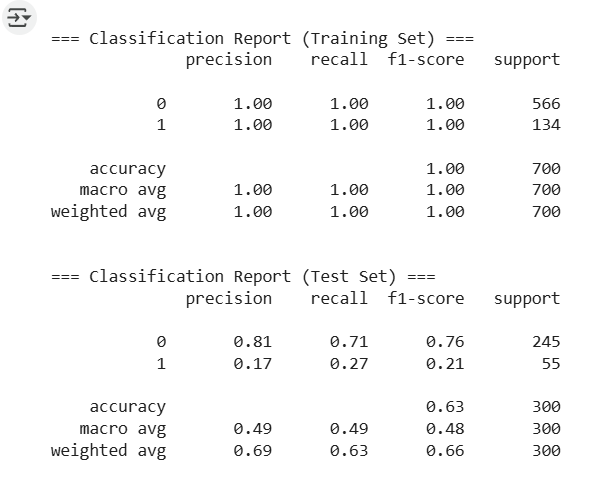

**Stage 2: After Oversampling with SMOTENC**

Oversampling was applied using SMOTENC to address the imbalance, though the classification model had no specific parameters set yet.


* **Change:** The F1 score on class 1 in the test set increased.


* **Test Set Performance:** The Accuracy improved to 0.68. Critically, the F1-score for Class 1 surged to 0.71 (a significant jump from 0.21). The F1-score for Class 0 slightly dropped.

* **Comparison (vs. Stage 1):** This step proved highly effective. Accuracy increased from 0.63 to 0.68. The dramatic rise in the Class 1 F1-score (from 0.21 to 0.71) confirmed that handling the class imbalance was the most crucial initial step, though it led to a decrease in the majority class performance.

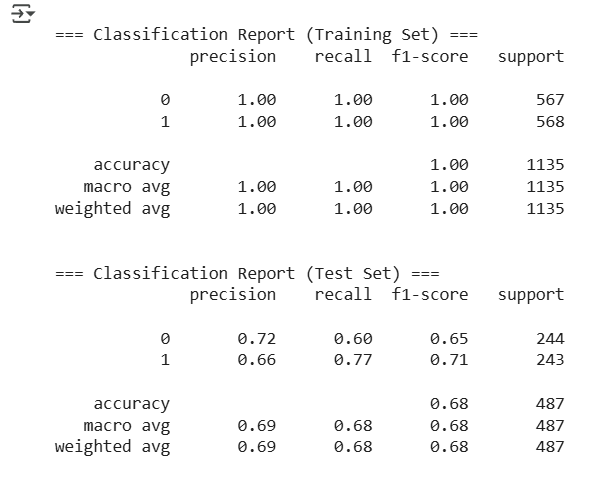

**Stage 3: Handle Overfitting, Feature Importance, and Oversampling Again**

This stage focused on addressing potential overfitting using KFold Cross Validation , performing feature importance , and applying oversampling again.



* **Change:** Accuracy increased but only slightly.


* **Test Set Performance:** Accuracy reached 0.69. The F1-score for Class 0 improved, and the F1-score for Class 1 dropped slightly.

* **Comparison (vs. Stage 2):** Accuracy saw a marginal increase (0.68 to 0.69). F1-scores improved and decreased, showing that CV and feature importance helped slightly boost overall performance and further balanced the model's predictions.

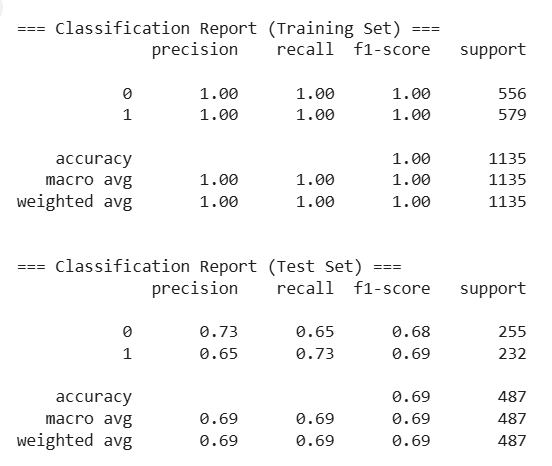

**Stage 4: Feature Selection (Correlation Heatmaps)**

A selection of features (X Features) was made based on their correlation in heatmaps.


* **Change:** Performance increased but only slightly.

* **Test Set Performance:** Accuracy increased to 0.70. The F1-scores became very balanced: 0.71 for Class 0 and 0.70 for Class 1.

* **Comparison (vs. Stage 3):** Accuracy saw another slight increase (0.69 to 0.70). The feature selection achieved excellent balance, with the model performing almost identically well on both classes.



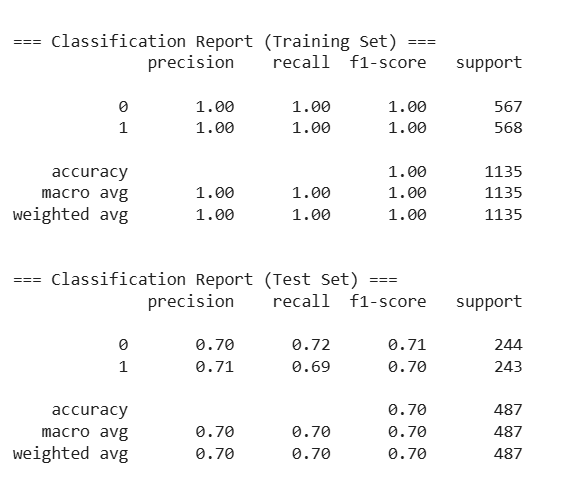

**Stage 5: Further Feature Selection**

Another round of feature selection (Select X features again) was performed.


* **Test Set Performance:** Accuracy made a significant jump to 0.74. Both F1-scores improved: 0.72 for Class 0 and 0.75 for Class 1.
* **Comparison (vs. Stage 4):** This feature selection step proved highly effective, yielding a large 4% increase in Accuracy (from 0.70 to 0.74) and improving the F1-scores for both classes, indicating a better set of predictive features had been isolated.

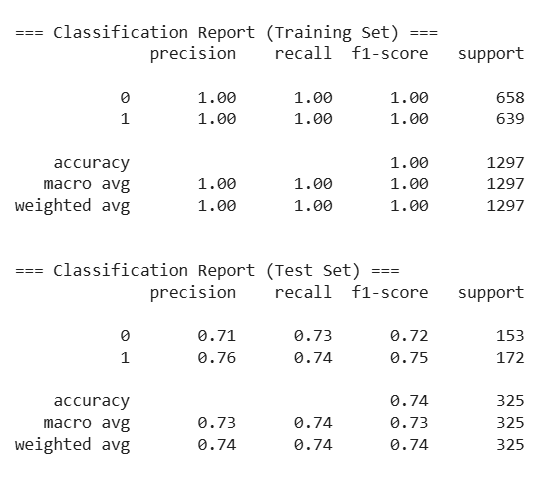

**Stage 6: Hyperparameter Tuning using Grid Search**

The final step was Hyperparameter Tuning using Grid Search.


* **Test Set Performance:** The model achieved its highest Accuracy of 0.76. Both F1-scores peaked at 0.75 for Class 0 and 0.77 for Class 1.


* **Comparison (vs. Stage 5):** Grid Search successfully fine-tuned the model's parameters, resulting in the best overall and most balanced performance across all metrics. This represents the final Tuned Model.

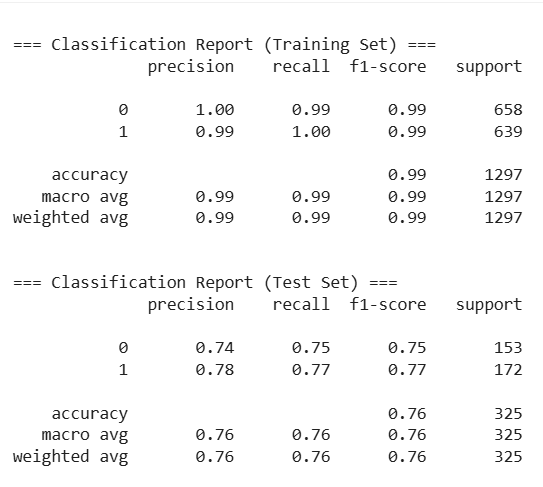

**Summary of Baseline vs. Final Tuned Model**

The final model (Stage 6) shows a massive improvement over the initial Baseline Model (Stage 1). The total Accuracy increased from 0.63 to 0.76. Crucially, the model's ability to predict employee Attrition (Class 1) improved drastically, with the F1-score rising from a very poor 0.21 (Baseline) to an excellent 0.77 (Tuned). This confirms that the combination of class imbalance handling and hyperparameter tuning was essential to developing a reliable model.

Jevon Ivander K / 0706022310028